# Homework 4 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [30]:
import pickle
import random
import numpy as np
import pandas as pd
from tqdm import tqdm 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate, KFold, cross_val_score

In [3]:
print("Fetching Data")
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
print("Done Fetching Data")
print("Splitting")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Done Splitting test/train")

Fetching Data
Done Fetching Data
Splitting
Done Splitting test/train


b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

Accuracy on testing set =  0.9723571428571428


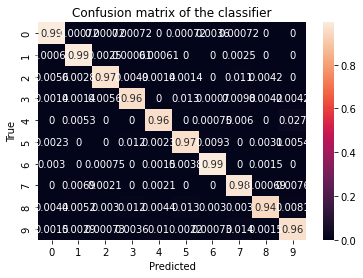

In [4]:
############# Train Model with K=1 ##########################
def train(x_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=1)
    model = knn.fit(x_train, y_train)

    with open('model_pkl', 'wb') as f:
        pickle.dump(model, f)

        
####################################################

############# Test Model ###########################
def test(x_test, y_test):
    with open('model_pkl', 'rb') as f:
        model = pickle.load(f)
    
    y_test_predictions = model.predict(x_test)

    # Evaluate model on the testing set
    print("Accuracy on testing set = ", accuracy_score(y_test, y_test_predictions))

    # Plot a confusion matrix
    cm = confusion_matrix(y_test, y_test_predictions, normalize='true')
    sns.heatmap(cm, annot=True)
    plt.title('Confusion matrix of the classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
####################################################

    
# run train and test     
train(x_train, y_train)
test(x_test, y_test)

The model performed quite well overall, with an overall accuracy score of 0.97 with k=1. It performed the best on class 0, 1, and 6 with accuracy scores of .99, but performed the worst (most confusion) on class 8 where it achieved a score of .94

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

In [5]:
num_k = range(1,21)
accuracy_scores={}
scores_list = []
accuracy_train={}
scores_list_train = []
for k in tqdm(num_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(x_train, y_train)
    # Testing Accuracy
    y_test_predictions = model.predict(x_test)
    accuracy_scores[k]= accuracy_score(y_test, y_test_predictions)
    scores_list.append(accuracy_score(y_test, y_test_predictions))
    # Training Accuracy 
    accuracy_train[k] = model.score(x_train, y_train)
    scores_list_train.append(model.score(x_train, y_train))
    

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [52:16<00:00, 156.81s/it]


In [6]:
print(scores_list_train)

[1.0, 0.9854642857142857, 0.9863035714285714, 0.9825, 0.981, 0.978625, 0.9777678571428572, 0.9759821428571429, 0.9752321428571429, 0.9739821428571429, 0.9732857142857143, 0.9720892857142858, 0.9715714285714285, 0.9701785714285714, 0.969625, 0.9692321428571429, 0.9684464285714286, 0.9678571428571429, 0.967375, 0.9667142857142857]


[0.9723571428571428, 0.9675714285714285, 0.9722142857142857, 0.9709285714285715, 0.9720714285714286, 0.9710714285714286, 0.9710714285714286, 0.9695714285714285, 0.9687142857142857, 0.9680714285714286, 0.9672142857142857, 0.9667142857142857, 0.9655714285714285, 0.9657857142857142, 0.9642142857142857, 0.9636428571428571, 0.9632142857142857, 0.9628571428571429, 0.9622857142857143, 0.9622142857142857]


0.9723571428571428


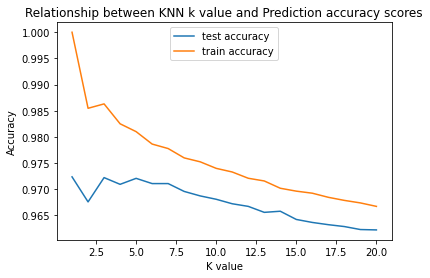

In [7]:
plt.plot(num_k, scores_list, label = "test accuracy")
plt.plot(num_k, scores_list_train, label = "train accuracy")
plt.title("Relationship between KNN k value and Prediction accuracy scores")
plt.xlabel("K value")
plt.ylabel("Accuracy")
leg = plt.legend(loc='upper center')
print(scores_list)
print()
print()
print(max(scores_list))

According to the plot of the testing accuracy, k=1 is optimal in the sense that it returns the highest accuracy score. However, a model utilizing k=1 is inherently a model prone to flaws, so k=1 should not necessarily be picked. The next highest accuracy score occurs at k=3. The accuracy score is similar enough that the difference is fairly negligible and having a model other than one with k=1 is superior, so the model with k=3 is "the most optimal" in that sense. 

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

NOTE: I plotted both models for K=1 and K=3, mostly because arguments can be made on both sides for which is technically optimal. overall I believe k=3 is the better model, but I wanted to plot both to see what the confusion matrices looked like. K=1 is plotted first, followed by the confusion matrix for K=3 

Accuracy on testing set =  0.9723571428571428


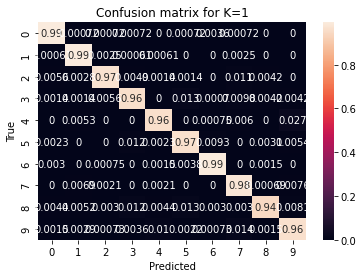

In [8]:
############# Train Model ##########################
def train(x_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=1)
    model = knn.fit(x_train, y_train)

    with open('model_pkl', 'wb') as f:
        pickle.dump(model, f)

        
####################################################

############# Test Model ###########################
def test(x_test, y_test):
    with open('model_pkl', 'rb') as f:
        model = pickle.load(f)
    
    y_test_predictions = model.predict(x_test)

    # Evaluate model on the testing set
    print("Accuracy on testing set = ", accuracy_score(y_test, y_test_predictions))

    # Plot a confusion matrix
    cm = confusion_matrix(y_test, y_test_predictions, normalize='true')
    sns.heatmap(cm, annot=True)
    plt.title('Confusion matrix for K=1')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
####################################################

    
# run train and test     
train(x_train, y_train)
test(x_test, y_test)

Accuracy on testing set =  0.9722142857142857


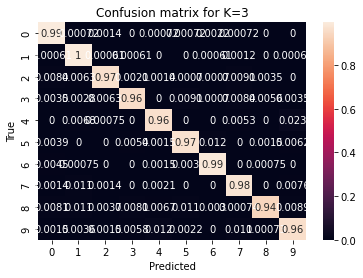

In [9]:
############# Train Model ##########################
def train(x_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=3)
    model = knn.fit(x_train, y_train)

    with open('model_pkl', 'wb') as f:
        pickle.dump(model, f)

        
####################################################

############# Test Model ###########################
def test(x_test, y_test):
    with open('model_pkl', 'rb') as f:
        model = pickle.load(f)
    
    y_test_predictions = model.predict(x_test)

    # Evaluate model on the testing set
    print("Accuracy on testing set = ", accuracy_score(y_test, y_test_predictions))

    # Plot a confusion matrix
    cm = confusion_matrix(y_test, y_test_predictions, normalize='true')
    sns.heatmap(cm, annot=True)
    plt.title('Confusion matrix for K=3')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
####################################################

    
# run train and test     
train(x_train, y_train)
test(x_test, y_test)

According to the graph produced in 1C, the highest accuracy score was acheived using K=1. I confirmed this by retrieving the maxmimum value of the list of accuracy scores for all values of K between 1 and 20. I chose K=1 when producing the confusion matrix in part B, so this will be the same confusion matrix as seen there, with the same accuracy scores for the different classes. 
However, from a logical standpoint, it does not makes sense to have a mdoel that utilizes K=1. therefore, I chose the next highest accuracy score, which utilized K=3. This should in theory be a better model than the one that used K=1, despite it's marginally lower accuracy score on this particular dataset 

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

In [13]:
cv_full = KFold(n_splits=10)
k_range_full = range(1,21)
accuracy_full={}
scores_list_full = []
cv_scores_full = []
mean_cv_scores_full = []


for k in tqdm(k_range_full):  
    knn_full = KNeighborsClassifier(n_neighbors=k)
    model_full=knn_full.fit(X, y)
    accuracy_full[k] = model_full.score(X, y)
    scores_list_full.append(model_full.score(X, y))
    cv_scores_full.append(cross_validate(model_full, X, y, scoring='accuracy', cv=cv_full, return_train_score = True))
print("Done")

100%|██████████████████████████████████████████████████████████████████████████████| 20/20 [6:49:06<00:00, 1227.35s/it]

Done


In [14]:
j = 0
mean_cv_scores_full_test= []
mean_cv_scores_full_train = []

for col in cv_scores_full:
    mean_cv_scores_full_test.append(np.mean(cv_scores_full[j]["test_score"]))
    mean_cv_scores_full_train.append(np.mean(cv_scores_full[j]["train_score"]))
    j+=1
    
print(mean_cv_scores_full_test)
print()
print()
print(mean_cv_scores_full_train)

[0.9716000000000001, 0.9655142857142858, 0.9718, 0.9705428571428574, 0.9711571428571428, 0.9698142857142859, 0.9704142857142857, 0.9693285714285714, 0.9686857142857143, 0.9681428571428572, 0.9677714285714286, 0.9666428571428571, 0.9665142857142858, 0.965542857142857, 0.9652285714285714, 0.9647714285714286, 0.9640571428571428, 0.963742857142857, 0.9637142857142857, 0.9631714285714285]


[1.0, 0.9857317460317461, 0.9866142857142857, 0.9829444444444444, 0.9819126984126983, 0.9794555555555556, 0.9786904761904763, 0.9771603174603175, 0.9763253968253969, 0.9753222222222222, 0.9744968253968255, 0.9733936507936507, 0.9727666666666668, 0.9716460317460317, 0.9711015873015872, 0.9702142857142857, 0.9696857142857145, 0.9690396825396824, 0.9684571428571429, 0.9677222222222224]


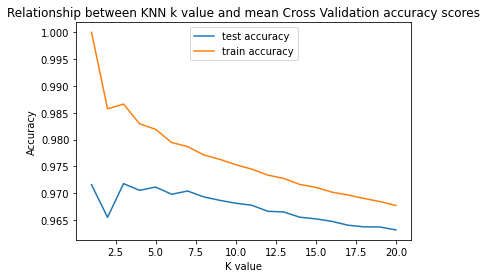

In [15]:
plt.plot(k_range_full,mean_cv_scores_full_test , label = "test accuracy")
plt.plot(k_range_full, mean_cv_scores_full_train, label = "train accuracy")
plt.title("Relationship between KNN k value and mean Cross Validation accuracy scores")
plt.xlabel("K value")
plt.ylabel("Accuracy")
leg = plt.legend(loc='upper center')

This time, the highest accuracy score was for the model using k=3 by a tiny bit, which confirms that the model using K=3 is the better model once more training data is used. Overall, the accuracy scores wer extremely similar between part C and part E, and even though K=3 had a higher accuracy score thank K=1, the overall shape of the graph remained nearly identical between the two parts. 

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

Important Note: Here, I plotted both the 3 nearest neighbors as well as the 1 nearest neighbor. I did this because K=1 was the highest accuracy model according to the numerical data, but K=3 was the next highest accuracy score and from a logical standpoint, makes for a much better model. So technically the "best model from d) " is K=1 from a pure numbers standpoint, but the better model is K=3. K=3 is plotted first, K=1 is plotted after it. 

In [16]:
import random

print(X.shape)
rand_index = random.randint(0,70000)
print(rand_index)

(70000, 784)
10259


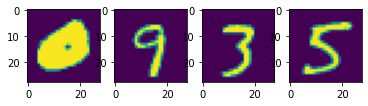

In [17]:
############# Train Model K = 3 ##########################
def train(x_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=3)
    model = knn.fit(x_train, y_train)

    with open('model_3', 'wb') as f:
        pickle.dump(model, f)

    
# run train   
train(x_train, y_train)


def plot_k_neighbors(model, base_img, k):
    _, neighbors = model.kneighbors(base_img)
    plt.subplot(1,k+1,1)
    plt.imshow(base_img[0].reshape(28, 28))
    i = 2
    for n in neighbors[0]:
        plt.subplot(1,k+1,i)
        plt.imshow(X[n].reshape(28, 28))
        i += 1
    plt.show()

with open('model_3', 'rb') as f:
    model_3 = pickle.load(f)
    
plot_k_neighbors(model_3, [X[rand_index]], 3)

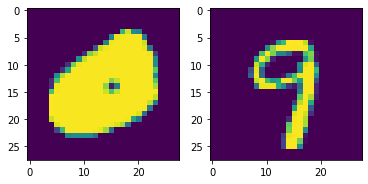

In [18]:
############# Train Model K = 1 ##########################
def train(x_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=1)
    model = knn.fit(x_train, y_train)

    with open('model_1', 'wb') as f:
        pickle.dump(model, f)

    
# run train   
train(x_train, y_train)


def plot_k_neighbors(model, base_img, k):
    _, neighbors = model.kneighbors(base_img)
    plt.subplot(1,k+1,1)
    plt.imshow(base_img[0].reshape(28, 28))
    i = 2
    for n in neighbors[0]:
        plt.subplot(1,k+1,i)
        plt.imshow(X[n].reshape(28, 28))
        i += 1
    plt.show()

with open('model_1', 'rb') as f:
    model_1 = pickle.load(f)
    
plot_k_neighbors(model_1, [X[rand_index]], 1)

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. **- 7 points**

In [21]:
def do_pca (n_components, data):
    X= StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    x_pca = pca.fit_transform(X)
    return pca, x_pca
pca, x_pca = do_pca(300, X) # use 300 to account for 90% variance 

cv_pca = KFold(n_splits=10)
k_range_pca = range(1,21) 
accuracy_pca={}
scores_list_pca = []
cv_scores_pca = []
mean_cv_scores_pca = []


for k in tqdm(k_range_pca):  
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    model_pca=knn_pca.fit(x_pca, y)
    accuracy_pca[k] = model_pca.score(x_pca, y)
    scores_list_pca.append(model_pca.score(x_pca, y))
    cv_scores_pca.append(cross_validate(model_pca, x_pca, y, scoring='accuracy', cv=cv_pca, return_train_score = True))
print("Done")



100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [5:21:02<00:00, 963.11s/it]

Done


In [22]:
i = 0
mean_cv_scores_pca_test= []
mean_cv_scores_pca_train = []

for col in cv_scores_pca:
    mean_cv_scores_pca_test.append(np.mean(cv_scores_pca[i]["test_score"]))
    mean_cv_scores_pca_train.append(np.mean(cv_scores_pca[i]["train_score"]))
    i+=1
    
print(mean_cv_scores_pca_test)
print()
print()
print(mean_cv_scores_pca_train)

[0.9509857142857141, 0.9422285714285715, 0.9514714285714284, 0.9498571428571427, 0.9512142857142857, 0.9491999999999999, 0.9495571428571429, 0.9480714285714285, 0.9481571428571428, 0.9464142857142857, 0.9464285714285715, 0.9451857142857143, 0.944842857142857, 0.9438000000000001, 0.9435857142857144, 0.9424428571428571, 0.9422285714285714, 0.9418142857142857, 0.9411714285714288, 0.9404714285714286]


[1.0, 0.9760984126984127, 0.9758460317460319, 0.9697333333333333, 0.9681031746031745, 0.9642476190476191, 0.9630253968253969, 0.9602222222222222, 0.9595015873015873, 0.957468253968254, 0.9562126984126984, 0.9544777777777778, 0.953577777777778, 0.952163492063492, 0.9514904761904761, 0.9502825396825395, 0.9495492063492061, 0.9482539682539681, 0.9477476190476188, 0.9467539682539682]


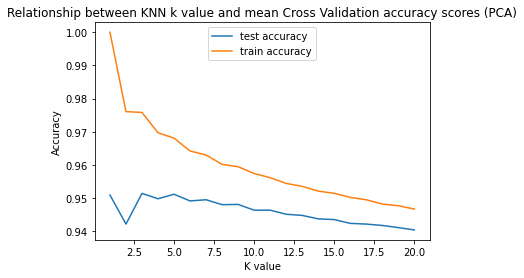

In [23]:
plt.plot(k_range_pca,mean_cv_scores_pca_test , label = "test accuracy")
plt.plot(k_range_pca, mean_cv_scores_pca_train, label = "train accuracy")
plt.title("Relationship between KNN k value and mean Cross Validation accuracy scores (PCA)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
leg = plt.legend(loc='upper center')

I utilize Principal Component Analysis (PCA) dimensionality reduction in order to reduce the dimensions of the dataset. Utilizing 300 components allows a model that is smaller than the original dataset while still maintaining a high degree of accuracy. In testing, the first 300 components account for 90% of the variance, so for any amount of components over 300 we add, we are only gaining small amounts of accuracy. utilizing 300 components strikes a good balance of reducing the dataset significantly, making it more manageable, while still retaining the vast majority of the accuracy 

within 5% of variance from the original dataset, meaning the results utilizing the reduced dataset should be 95% similar to the results obainted from using the full dataset. fewer components could be used for faster execution, but the model would be less accurate, and generally reduced datasets should aim to have less than 95% variance from the original dataset

Compared to the other graphs that were generated, this one was closest to the one generated in part E, with K=3 having the highest score, followed closely by K=1. The graph from a visual standpoint once again looks almost identical to the one generated in part E. The fact that it more closely resembles the dataset generated in part E is a good indication that even with the dimension reduction, it still produces a similar result to when we used the entire dataset. 

source: https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

In [55]:
df_test = pd.DataFrame()
df_test = pd.read_csv('test.csv')
df_train = pd.DataFrame()
df_train = pd.read_csv('train.csv')
df_train.drop('Cabin', axis=1, inplace=True) # too many missing values
df_test.drop('Cabin', axis=1, inplace=True)
df_train = df_train.dropna(axis='columns', thresh=len(df_train)-200)

data = [df_train,df_test]
for dataset in data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

print("Missing Values")
print(df_train.isna().any())

Missing Values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool


I dropped column for cabin since too many of the values were missing (77%) in order to create any kind of reasonable replacement of missing data based on data that was present. I filled the missing age values using a random integer based on the mean and standard deviation of all the ages present in the column already. since the distribution is not really normal, mean of all the ages was not the best possible way to replace the ages. The only missing values after that were two missing values in the Embarked column, and since the vast majority of the embarked values were "S" I filled in the missing values as S since it had the highest probability of being that value. I tried to see if the last names matched any others indicating some kind of pairing that would help me fill in the missing value more accurately but in both cases there were no shared last names. 

b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [56]:
data = [df_train,df_test]

for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())
# not alone = 0 means they did not have relatives
# not alone = 1 means they DID have relatives
#print(df_train['not_alone'].value_counts())
print(df_train.columns)

df_train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

df_test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

def extract_names(df): 

    name_df = pd.DataFrame()
    name_df["Name"] = df["Name"] 
    name_df["Last Name"] = name_df["Name"].str.split(',').str[0]
    name_df["Split Name"] = name_df["Name"].str.split(',').str[1]
    name_df["Title"] = name_df["Split Name"].str.split('.').str[0]  
    name_df["Split Name"] = name_df["Split Name"].str.split('.').str[1]
    name_df["First Name"] = name_df["Split Name"].str.split(' ').str[1]
    name_df["Middle Name"] = name_df["Split Name"].str.split(' ').str[2]
    
    return name_df[["Title"]]



df_train[['Title']] = extract_names(df_train) 
df_test[['Title']] = extract_names(df_train)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'IsAlone'],
      dtype='object')


In [57]:
## Dropping columns that shouldn't be needed going forward ##

trimmed_df = pd.DataFrame(df_train)
trimmed_df= trimmed_df.drop(columns = ['PassengerId','Name','Ticket', "SibSp"],axis=1)

trim_test_df = pd.DataFrame(df_test)
trim_test_df= trim_test_df.drop(columns = ['PassengerId','Name','Ticket', "SibSp"],axis=1)

## converting all the data to numerical ##
data = [trimmed_df, trim_test_df]

for dataset in data:
    dataset['Title'] = dataset['Title'].replace([' Lady', ' Countess',' Capt', ' Col',' Don', ' Dr', ' Major', ' Rev', ' Sir', ' Jonkheer', ' Dona'], 'Rare')
    dataset['Title'] = dataset['Title'] = dataset['Title'].replace(' Mlle', ' Miss')
    dataset['Title'] = dataset['Title'] = dataset['Title'].replace(' Ms', ' Miss')
    dataset['Title'] = dataset['Title'] = dataset['Title'].replace(' Mme', ' Mrs')

    title_mapping = {" Mr": 1, " Master": 2, " Mrs": 3, " Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare']= 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']= 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age']= 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;


trimmed_df

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,1,0,0,0,2,0,1.0
1,1,1,1,2,0,3,1,2,0,3.0
2,1,3,1,1,0,1,0,1,1,4.0
3,1,1,1,2,0,3,0,2,0,3.0
4,0,3,0,2,0,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,1,0,1,1,5.0
887,1,1,1,1,0,2,0,1,1,4.0
888,0,3,1,2,2,2,0,4,0,4.0
889,1,1,0,1,0,2,1,1,1,1.0


I added a column to the dataframe that combines the "Parch" and "SibSp" columns, since it appears that those with between 1-3 relatives had a higher rate of survival than those with either no relatives or greater than 3 relatives on board the ship. The Family Size and isAlone column represent these data points. I also added a column that only contains the title, as that seems to correlate with survival as well. Additionally, I transformed the "Sex" and "Embarked" columns to Numerical data so they can be used to train our model. All data was changed to numerical data points based on direct 1:1 mapping or based on a range (for example ages between 16 and 32 are one category, etc) 

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **- 10 points**

resources:
https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

https://www.analyticsvidhya.com/blog/2021/07/titanic-survival-prediction-using-machine-learning/

<AxesSubplot:title={'center':'Correlation of Features'}>

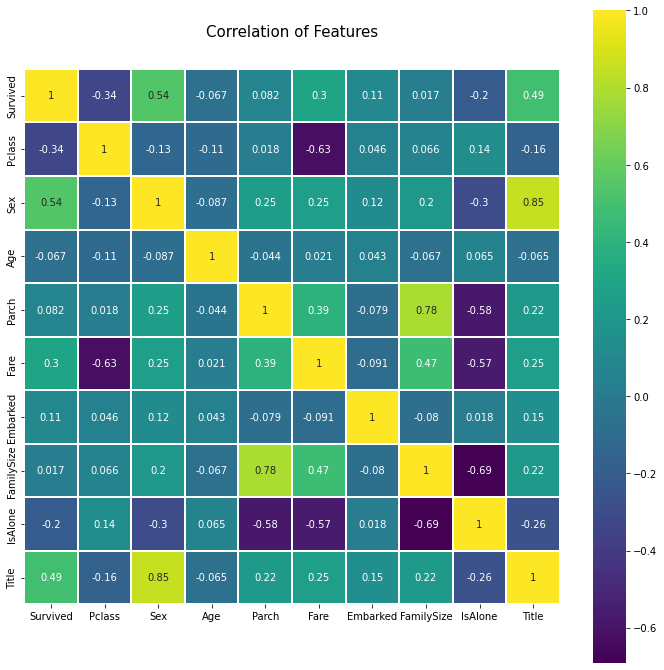

In [58]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(trimmed_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [59]:
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

gini_impurity_starting_node = get_gini_impurity(342, 891)
print(gini_impurity_starting_node)

gini_impurity_title_1 = get_gini_impurity(81, 517)
print(gini_impurity_title_1)

0.47301295786144265
0.26425329886377663


In [60]:
cv = KFold(n_splits=10)            
accuracies = list()

depth_range = range(1,40)

for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
  
    for train_fold, valid_fold in cv.split(trimmed_df):
        f_train = trimmed_df.loc[train_fold] 
        f_valid = trimmed_df.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) 
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])
        fold_accuracy.append(valid_acc)

    accuracies.append(np.mean(fold_accuracy))

    
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.778914
         2          0.794694
         3          0.828277
         4          0.827166
         5          0.818202
         6          0.812622
         7          0.804732
         8          0.796879
         9          0.803670
        10          0.795768
        11          0.795768
        12          0.794644
        13          0.795793
        14          0.792409
        15          0.795793
        16          0.792409
        17          0.795780
        18          0.796891
        19          0.795780
        20          0.799139
        21          0.796904
        22          0.792409
        23          0.792422
        24          0.795780
        25          0.791286
        26          0.793521
        27          0.796904
        28          0.796916
        29          0.799126
        30          0.792422
        31          0.794644
        32          0.795780
        33          0.799151
        34    

In [75]:
y_train = trimmed_df['Survived']
x_train = trimmed_df.drop(['Survived'], axis=1).values 



decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

I tried to use as much information as possible to make my decision as to what parameters to take in when training the decision tree. In the end, I had already trimmed down the dataset to the most relevant features when it came to predicting survival, so the last parameter to choose was depth. I ran Cross validation accuracy scores on trees with max depth ranging from one to 39, and the highest accuracy score came from a max depth of 3, so that is what I chose to be my max height when training the tree. 

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

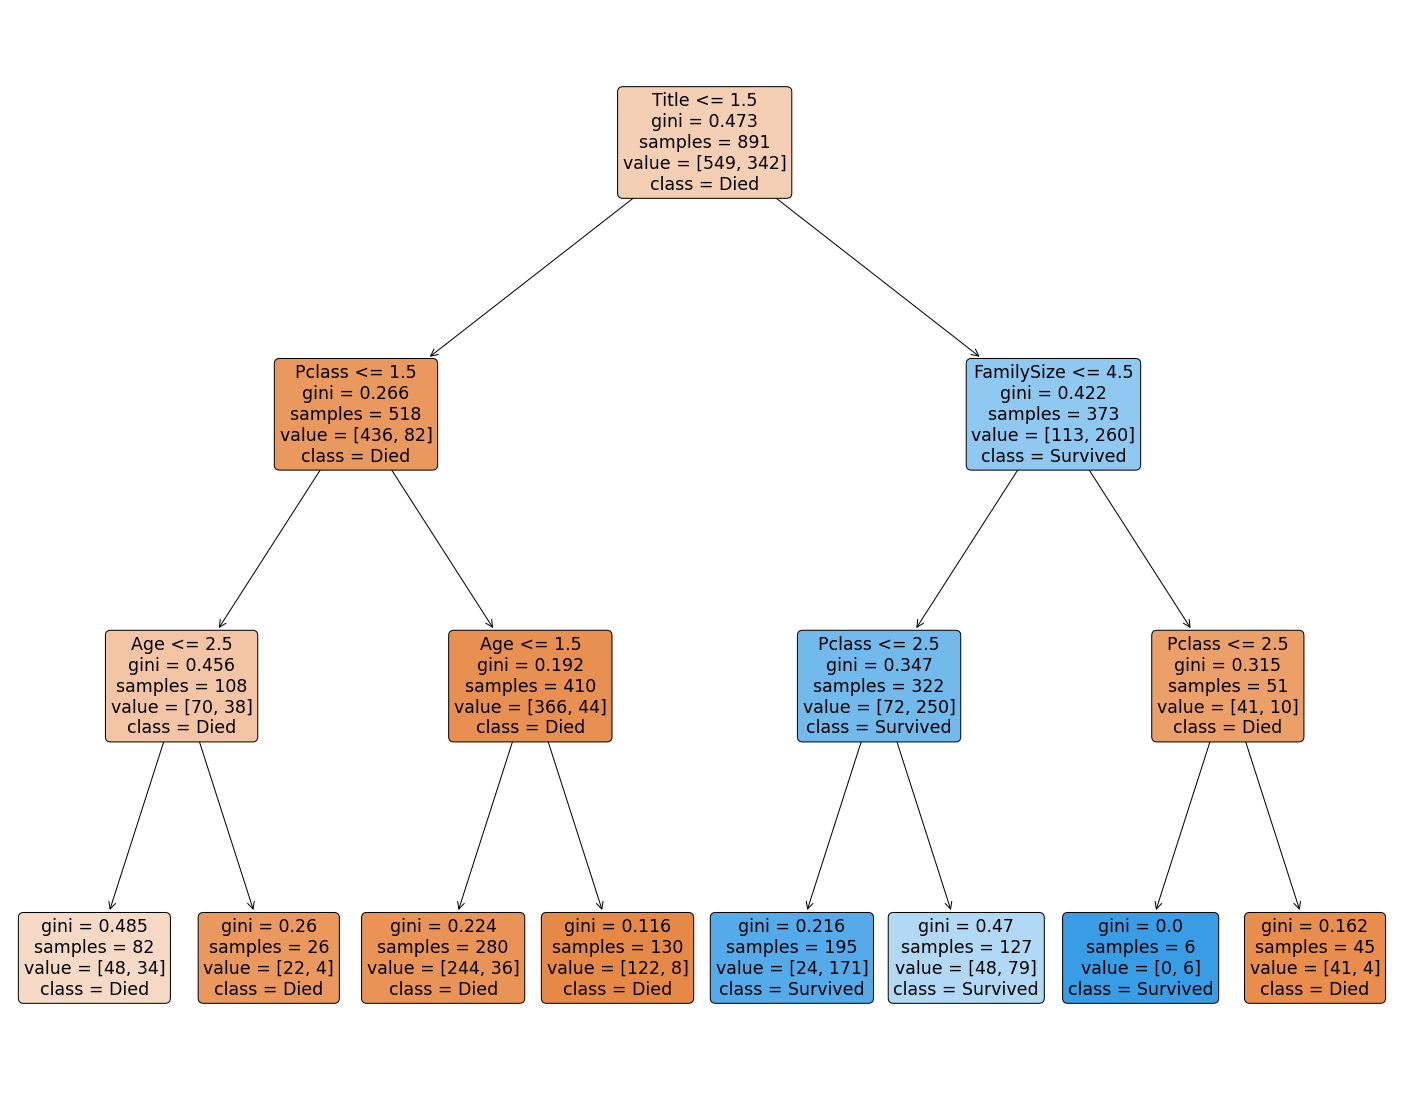

In [76]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(decision_tree,
      max_depth = 3,
      impurity = True,
      feature_names = list(trimmed_df.drop(['Survived'], axis=1)),
      class_names = ['Died', 'Survived'],
      rounded = True,
      filled= True )
# left -> true
# right -> false

Decision trees work by taking a feature and splitting into two separate paths base on true/false. In this case the root node is the Title, since it had the greatest effect on gini impurity and should be a good predictor of whether or not a person survived. In this case title<=1.5 means the title Mr, so to the left is (true) individuals with the Mr title and to the right is those with a title other than Mr. each of the sub trees is then divided based on whichever remaining criteria has the greatest effect on gini impurity score. In the case of the left subtree, people with the title Mr can then be split on Passenger class (Pclass), then by Age and fare. in the right subtree we see that it splits on family size, where those with a family size of less than 4.5 were more likely to survive, regardless of Pclass. Meanwhile those with a family size of more than 4.5 can be split by Pclass and those with a pclass higher than 2.5 were actually less likely to survive than those with a lower than 2.5 pclass. It should be noted that this dataset is pretty small and limited, and combined with the inherent lack of robustness of classifier trees, this model is unlikely to be all that accurate. 

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 10 points**

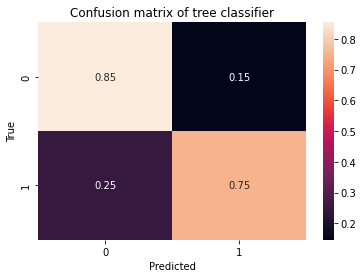

82.3

In [62]:
y=trimmed_df.Survived
x=trimmed_df.drop('Survived',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)

y_pred = decision_tree.predict(x_test)


# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of tree classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

The model is by far the most accurate when it comes to predicting if someone died, and is decidedly less competent at correctly predicting when a passenger has survived. This is probably due to a multitude of reasons, but one of them may simply be due to the much higher number of individuals who died in the dataset compared to the survivors, essentially allowing the model to have more information to train on about those who died compared to those who survived. This model has some serious flaws, and tends to obviously misclassify data points. For example in the right subtree, the model indicates that someone without the title mr and with a subclass of less than 2.5 should never die, but that's because the training dataset only contains people who fit this criteria who survived, and none that died. Issues with the dataset that further exacerbate the weaknesses of this model type are a good example of "garbage in garbage out".  

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**


Mean cross-validated training accuracy score: 0.8350686641697876
Test accuracy: 0.9


Text(33.0, 0.5, 'True')

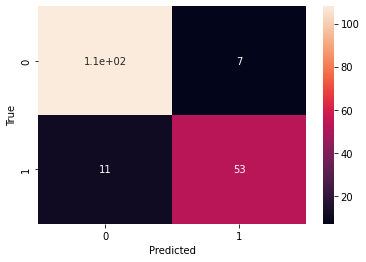

In [77]:
import warnings
warnings.filterwarnings("ignore")
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20,25,30,35], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(decision_tree, param_grid=hyperparameter_space, 
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

gs.fit(x_train, y_train)
#print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(x_train, y_train)
y_pred = gs.best_estimator_.predict(x_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

3


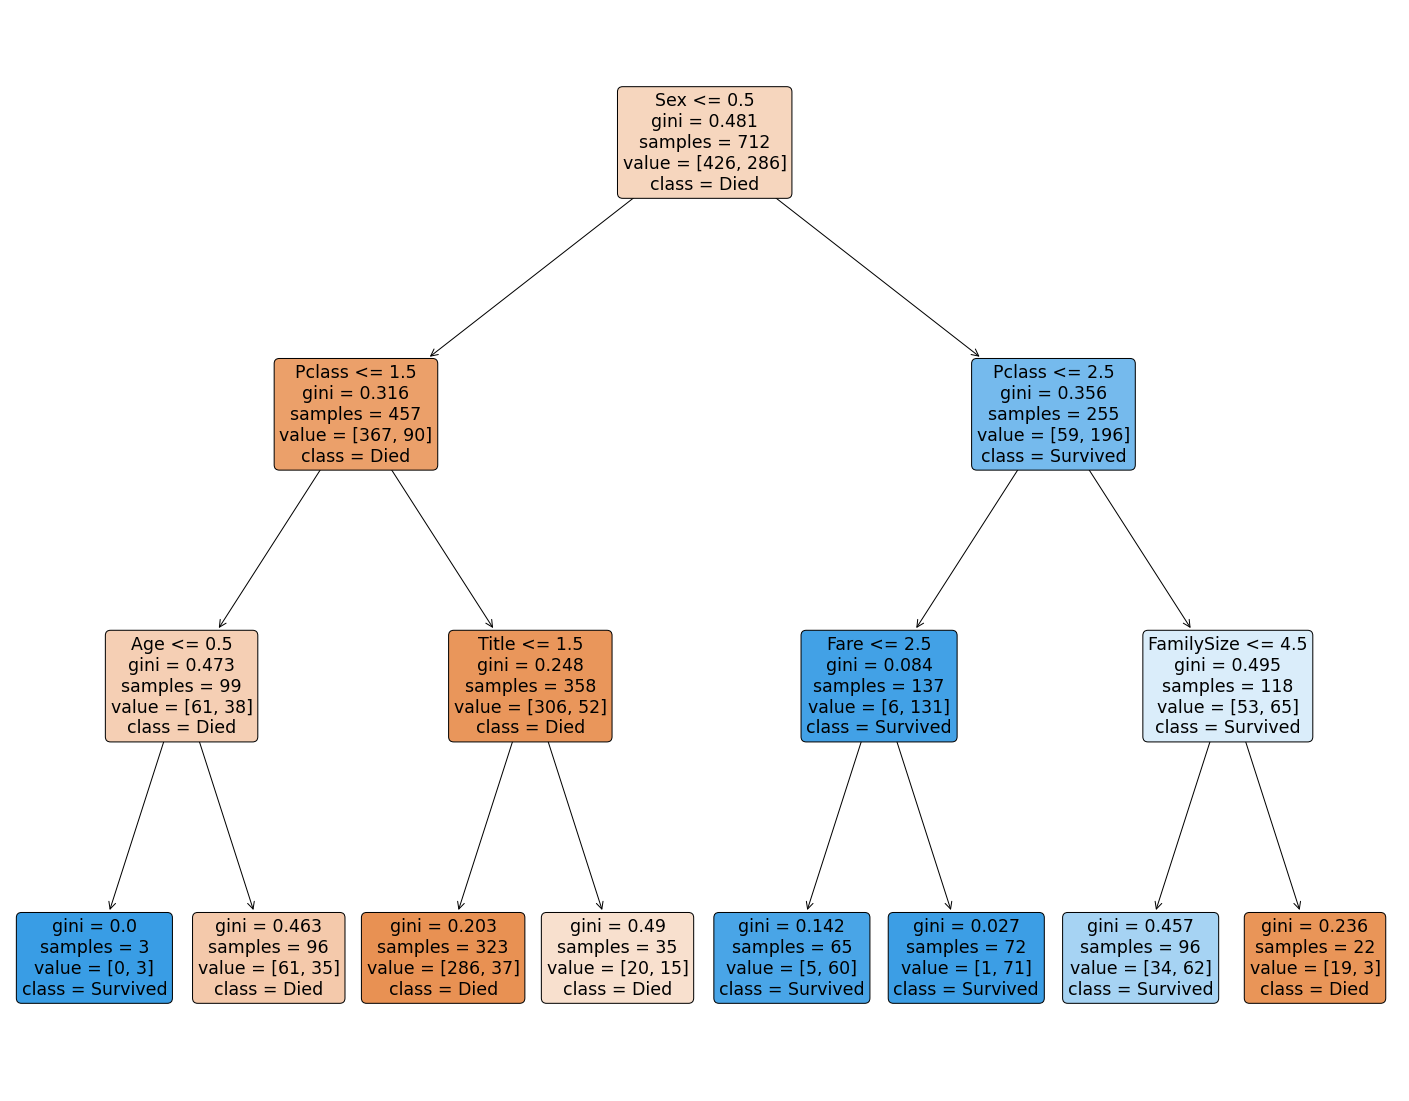

In [64]:
print(gs.best_params_['max_depth'])
decision_tree = DecisionTreeClassifier(
    max_depth = gs.best_params_['max_depth'], 
    min_samples_split =gs.best_params_['min_samples_split'],
    min_samples_leaf = gs.best_params_['min_samples_leaf'])

decision_tree.fit(x_train, y_train)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(decision_tree,
      max_depth = 3,
      impurity = True,
      feature_names = list(trimmed_df.drop(['Survived'], axis=1)),
      class_names = ['Died', 'Survived'],
      rounded = True,
      filled= True )
# left -> true
# right -> false

Changing max depth appears to have the most direct influence on the accuracy of the model. Initially, I had set the max depth to 3 since my cross validation (CV) scores indicated that would yield the highest accuracy model. However, this gave me an accuracy of around 82% which was disappointing. In order to get a better accuracy I decided to do a grid search that would try a variety of tree depths and a variety of min_leaf_split and min_samples_leaf parameter values and return the combination of values for all these parameters that returns the highest accuracy score. However, this turned out to be a max depth of 3, min_leaf_split=3 and min_samples_leaf=1. This model returns a test accuracy of 90%, which is a large improvement in accuracy over the last model. 

g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 10 points**

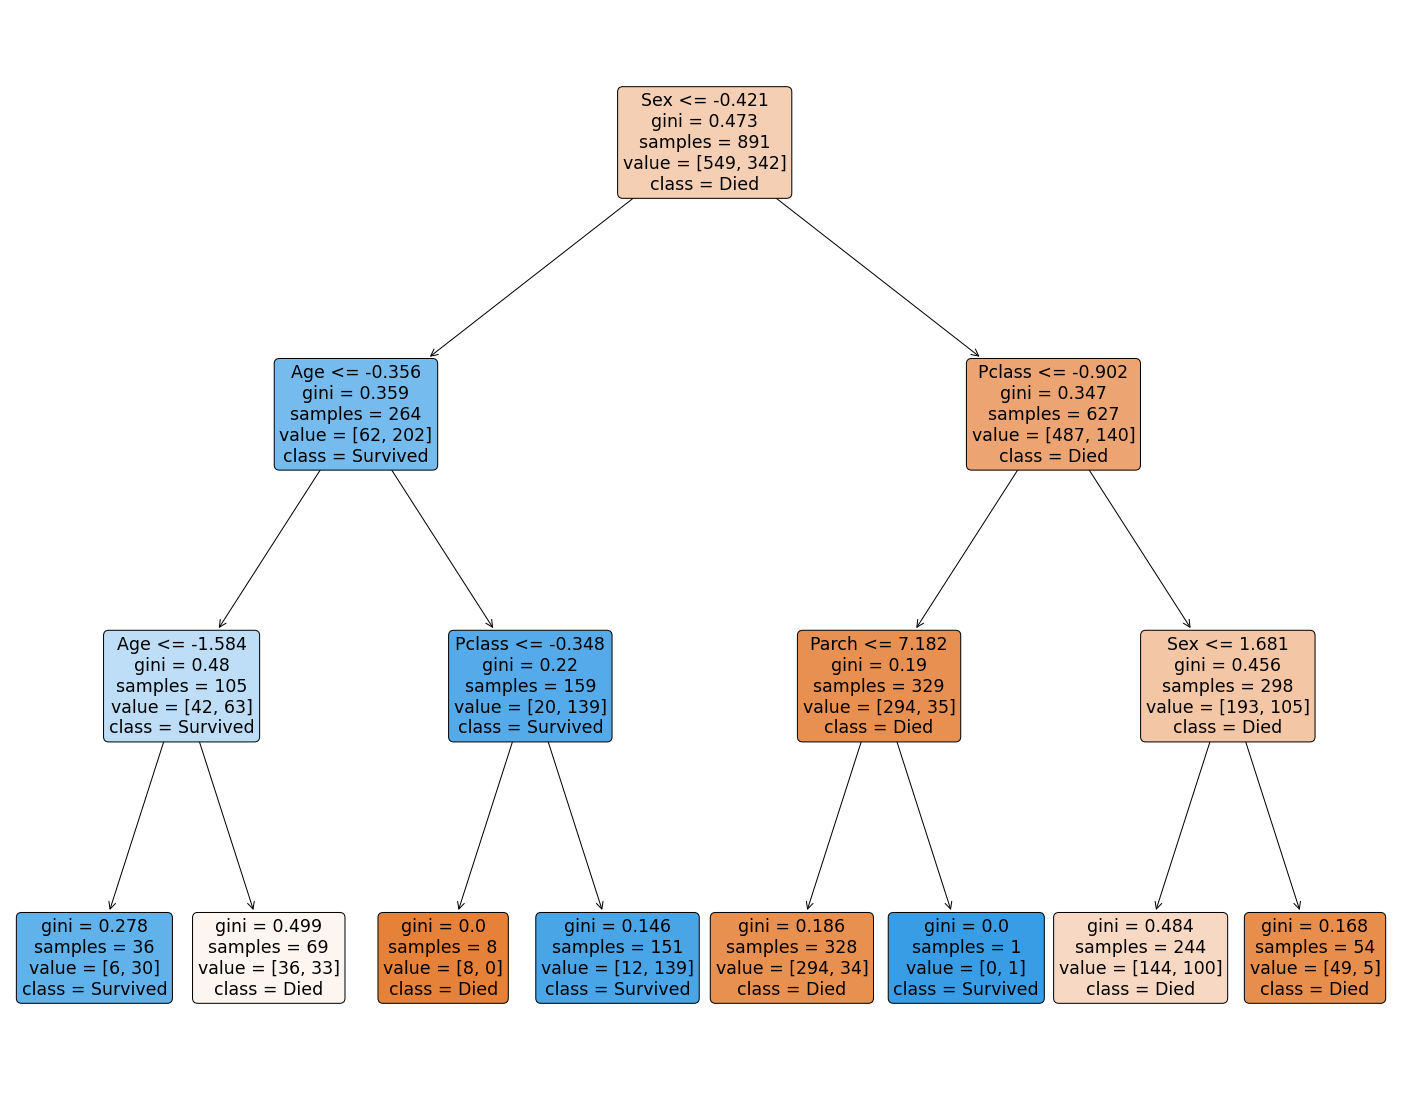

In [81]:
variables = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
target = ['Survived']
n_components = 5
x_var = trimmed_df.loc[:, variables].values
y_target = trimmed_df.loc[:, target].values
x_var = StandardScaler().fit_transform(x_var)
pca = PCA(n_components)
x_pca = pca.fit_transform(x_var)

x_pca = pd.DataFrame(x_pca)


y_train = y_target
x_train = x_pca

###### DECISION TREE ##################################################

decision_tree = DecisionTreeClassifier(
    max_depth = gs.best_params_['max_depth'], 
    min_samples_split =gs.best_params_['min_samples_split'],
    min_samples_leaf = gs.best_params_['min_samples_leaf'])

decision_tree.fit(x_train, y_train)


fig = plt.figure(figsize=(25,20))
_ = plot_tree(decision_tree,
      max_depth = 3,
      impurity = True,
      feature_names = list(trimmed_df.drop(['Survived'], axis=1)),
      class_names = ['Died', 'Survived'],
      rounded = True,
      filled= True )
# left -> true
# right -> false

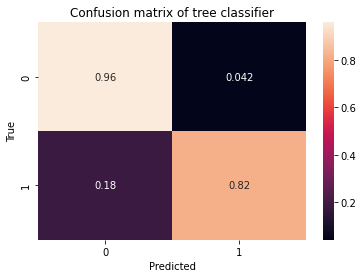

88.2

In [80]:
#######Confusion Matrix ###############################################


y=y_target
x=x_pca

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)

y_pred = decision_tree.predict(x_test)


# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of tree classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

I thought that reducing the dataset to so few dimensions would reduce the accuracy of the model more significantly, but when using the same parameters as are being used to create a tree classifier for the full dimension dataset, the accuracy is very close whether the full dataset or the reduced dataset are used to train the model. Perhaps this would be different if the original full sized training dataset was much larger, but since the provided training dataset is relatively small, we cannot be sure. Although this model appears to be accurate, it is more difficult to interpret/read since all the values have been normalized in order to be processed correctly by PCA. This results in a graph that while it might be good at predicting survivorship, is nearly impossible to read due to the normalized values being used in the labels, making it hard to know what the original values they are referring to are. This model overall is much better at predicting survivorship as well as reduces the false positives and false negatives of the first model. However, compared to the second model, it tends to have a few more false positives and many more false negatives, which contributes to the lower overall accuracy score of this model, even if it is overall pretty adept at producing true positives and espectially true negatives. 

# Bonus (40 Points)

## Random Forests
 Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

- In this task, you are supposed to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs. 
 
 

**Note**: Your are not supposed to use random forests model from sklearn or any other library, but however, you can use those libraries to construct multiple decision trees 

You can use any other library for your convenience, unless you are not trying to load a Random forest model from those libraries. 

### Construct your model (10 points)

In [67]:
df_test = pd.DataFrame()
df_test = pd.read_csv('test.csv')
df_train = pd.DataFrame()
df_train = pd.read_csv('train.csv')
df_train.drop('Cabin', axis=1, inplace=True) 
df_test.drop('Cabin', axis=1, inplace=True)
df_train = df_train.dropna(axis='columns', thresh=len(df_train)-200)


data = [df_train,df_test]
for dataset in data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

print("Missing Values")
print(df_train.isna().any())

data = [df_train,df_test]

for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())
# not alone = 0 means they did not have relatives
# not alone = 1 means they DID have relatives



df_train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

df_test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

def extract_names(df): 
    name_df = pd.DataFrame()
    name_df["Name"] = df["Name"] 
    name_df["Last Name"] = name_df["Name"].str.split(',').str[0]
    name_df["Split Name"] = name_df["Name"].str.split(',').str[1]
    name_df["Title"] = name_df["Split Name"].str.split('.').str[0]  
    name_df["Split Name"] = name_df["Split Name"].str.split('.').str[1]
    name_df["First Name"] = name_df["Split Name"].str.split(' ').str[1]
    name_df["Middle Name"] = name_df["Split Name"].str.split(' ').str[2]
    
    return name_df[["Title"]]


df_train[['Title']] = extract_names(df_train) 
df_test[['Title']] = extract_names(df_train)



## Dropping columns that shouldn't be needed going forward ##

trimmed_df = pd.DataFrame(df_train)
trimmed_df= trimmed_df.drop(columns = ['PassengerId','Name','Ticket', "SibSp"],axis=1)

trim_test_df = pd.DataFrame(df_test)
trim_test_df= trim_test_df.drop(columns = ['PassengerId','Name','Ticket', "SibSp"],axis=1)

## converting all the data to numerical ##
data = [trimmed_df, trim_test_df]

for dataset in data:
    dataset['Title'] = dataset['Title'].replace([' Lady', ' Countess',' Capt', ' Col',' Don', ' Dr', ' Major', ' Rev', ' Sir', ' Jonkheer', ' Dona'], 'Rare')
    dataset['Title'] = dataset['Title'] = dataset['Title'].replace(' Mlle', ' Miss')
    dataset['Title'] = dataset['Title'] = dataset['Title'].replace(' Ms', ' Miss')
    dataset['Title'] = dataset['Title'] = dataset['Title'].replace(' Mme', ' Mrs')

    title_mapping = {" Mr": 1, " Master": 2, " Mrs": 3, " Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare']= 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']= 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age']= 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;


print(trimmed_df)



Missing Values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool
     Survived  Pclass  Sex  Age  Parch  Fare  Embarked  FamilySize  IsAlone  \
0           0       3    0    1      0     0         0           2        0   
1           1       1    1    2      0     3         1           2        0   
2           1       3    1    1      0     1         0           1        1   
3           1       1    1    2      0     3         0           2        0   
4           0       3    0    2      0     1         0           1        1   
..        ...     ...  ...  ...    ...   ...       ...         ...      ...   
886         0       2    0    1      0     1         0           1        1   
887         1       1    1    1      0     2         0           1        1   
888         0       3    1    1

In [68]:
y=trimmed_df.Survived
x=trimmed_df.drop('Survived',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, shuffle = True)

parameters = {
'max_depth':[2,3,4,6,8,10,12,15,20,25,30,35], 
'min_samples_leaf':[1,2,4,6,8,10,20,30],
'min_samples_split':[1,2,3,4,5,6,8,10],
'max_leaf_nodes': [18, 19],
'max_features': [2]
}


model = DecisionTreeClassifier(random_state=42)


clf = GridSearchCV(model, parameters)
clf.fit(x_train, y_train)


clf.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=2, max_leaf_nodes=18,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [69]:
y_pred_train = clf.predict(x_train)
print("Accuracy on training set: {:.2f}%".format(accuracy_score(y_train, y_pred_train) * 100))
y_pred_test = clf.predict(x_test)
print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred_test) * 100))

Accuracy on training set: 82.16%
Accuracy on test set: 82.68%


In [70]:
x_train = x_train.values
y_train = y_train.values

In [71]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, train_size=0.0125, random_state=42)
rs.get_n_splits(x_train)
print(rs)

X_subsets = dict()
y_subsets = dict()

for i, indexes in enumerate(rs.split(x_train)):
    X_subsets[i] = x_train[indexes[0], :]
    y_subsets[i] = y_train[indexes[0]]

print(X_subsets[0].shape)
print()
print()
print(y_subsets[0].shape)
    
    

assert X_subsets[0].shape == (8, 9), ("Dimensional Error.")
assert y_subsets[0].shape == (8,), ("Dimensional Error.")
assert y_subsets[100].shape[0] == X_subsets[100].shape[0], ("Dimensional mismatch")
assert len(X_subsets.keys()) == 1000, ("The number of subsets is not 1000.")
assert len(y_subsets.keys()) == 1000, ("The number of subsets is not 1000.")

print()

ShuffleSplit(n_splits=1000, random_state=42, test_size=None,
       train_size=0.0125)
(8, 9)


(8,)



In [72]:
clf = DecisionTreeClassifier(max_depth=6, max_features=2, max_leaf_nodes=18,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)


scores = []
for subset in range(0, 1000):
    #fit model
    clf.fit(X_subsets[subset], y_subsets[subset])
    # make predictions
    y_pred = clf.predict(x_test)
    # evaluate accuracy and store
    scores.append(accuracy_score(y_test, y_pred))
    
print("Max accuracy: {:.2f}%.".format(max(scores) * 100))
print("Min accuracy: {:.2f}%.".format(min(scores) * 100))
print("Average accuracy: {:.2f}%.".format(np.mean(scores) * 100))
print("Std of accuracy: {:.2f}.".format(np.std(scores) * 100))

Max accuracy: 64.25%.
Min accuracy: 35.75%.
Average accuracy: 59.26%.
Std of accuracy: 10.83.


In [73]:
x_test = x_test.values

In [74]:
import statistics as stats
import itertools 

y_pred = []
for instance in range(0, x_test.shape[0]):
    predictions = []
    # loop through all the subsets
    for subset in range(0, 1000):
        # build a decision tree
        clf.fit(X_subsets[subset], y_subsets[subset])
        # make prediction for the instance in the test set and append to list
        predictions.append(clf.predict(x_test[instance].reshape(-1, 9)))
    assert len(predictions) == 1000, "The number of predictions is not 1,000."
    assert len(predictions[0]) == 1, "Dimensional Error."
    # choose most voted class
    predictions = list(itertools.chain.from_iterable(predictions))
    #predictions = [arr.tolist() for arr in predictions]
  #  print(type(predictions))
   # print(np.array(predictions))
    y_pred.append(stats.mode((predictions)))

assert len(y_pred) == x_test.shape[0], "Dimensional mismatch."

# evaluate performance using accuracy
print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy on test set: 64.25%


### Hyperparameter tuning, and model evaluation for random forests. (25 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] 


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

1) The code in the question above already experiments with tree depth
2) I reported the accuracies for trees in the range of 1 to 1000, which covers the specified range
3) I did not experiment with gini index or entropy

I hope that my implementatino above is enough to earn me some extra points despit the sub optimal formatting of the code. I had to complete this assignment between days at work over break so I did not have more hours to throw at this. Thanks for understanding. 

In [ ]:
# write your code here


### Calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 
